In [1]:
import pandas as pd

In [2]:
# cargar el archivo CSV

df = pd.read_csv("Titanic-Dataset.csv")

#Mostrar las primeras filas del DataFrame
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#informacion del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# se cuenta y se reemplazan los valores nulos en la columna "Age" por la mediana de la columna
df["Age"].isnull().sum()

mediana = df["Age"].median()

print("Mediana de la edad:", mediana)

df.fillna({"Age": mediana}, inplace=True)

df["Age"].isnull().sum()

Mediana de la edad: 28.0


0

In [10]:
# cambiamos la cabina de nula a "Desconocida"
df["Cabin"].fillna("Desconocida", inplace=True) 
df["Cabin"].isnull().sum()

0

In [11]:
# con la moda se reemplaza embarker

modaEmbarked = df["Embarked"].mode()[0]
print("Moda de Embarked:", modaEmbarked)
df["Embarked"].fillna(modaEmbarked, inplace=True)
df["Embarked"].isnull().sum()

Moda de Embarked: S


0

In [8]:
# contar el número de supervivientes
supervivientes = df[df["Survived"] == 1]
supervivientes.head()
print("Número de supervivientes:", len(supervivientes))

Número de supervivientes: 342


In [9]:
# contar el número de supervivientes por género
supervivientes_femeninos = df[(df["Survived"] == 1)&(df["Sex"]=="female")]
supervivientes_masculinos = df[(df["Survived"] == 1)&(df["Sex"]=="male")]
print("Número de supervivientes femeninos:", len(supervivientes_femeninos))
print("Número de supervivientes masculinos:", len(supervivientes_masculinos))

Número de supervivientes femeninos: 233
Número de supervivientes masculinos: 109


In [14]:
#filtros por edad
menores_18 = df[(df["Age"] >= 0) & (df["Age"]  <= 17)]
adultos = df[(df["Age"] >= 18) & (df["Age"]  <= 50)]    
mayores_65 = df[df["Age"] > 50]
print("Número de menores de 18 años:", len(menores_18))
print("Número de adultos entre 18 y 50 años:", len(adultos))
print("Número de mayores de 65 años:", len(mayores_65))

Número de menores de 18 años: 113
Número de adultos entre 18 y 50 años: 714
Número de mayores de 65 años: 64


In [16]:
jovenesSupervivientes = menores_18[menores_18["Survived"] == 1] 
print("Número de jóvenes supervivientes menores de 18 años:", len(jovenesSupervivientes))
adultosSupervivientes = adultos[adultos["Survived"] == 1] 
print("Número de adultos supervivientes entre 18 y 50 años:", len(adultosSupervivientes))
mayoresSupervivientes = mayores_65[mayores_65["Survived"] == 1] 
print("Número de mayores supervivientes mayores de 65 años:", len(mayoresSupervivientes))

Número de jóvenes supervivientes menores de 18 años: 61
Número de adultos supervivientes entre 18 y 50 años: 259
Número de mayores supervivientes mayores de 65 años: 22


In [17]:
import matplotlib.pyplot as plt

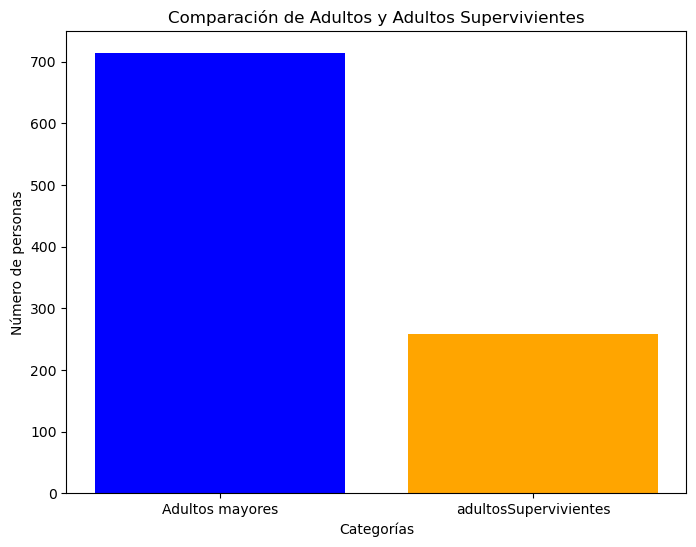

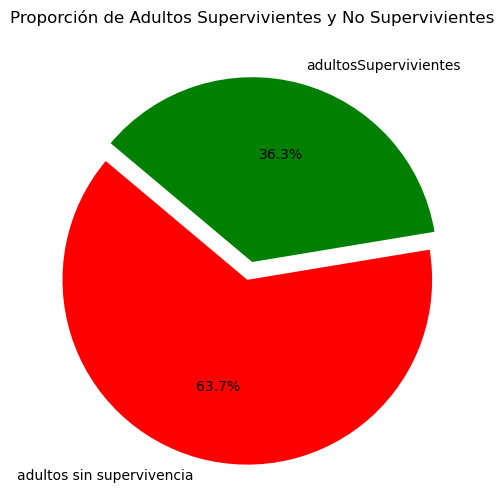

In [24]:
total_adultos = len(adultos)
total_adultos_supervivientes = len(adultosSupervivientes)

etiquetas = ["Adultos mayores", "adultosSupervivientes"]

# Gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(etiquetas, [total_adultos, total_adultos_supervivientes], color=['blue', 'orange'])
plt.title("Comparación de Adultos y Adultos Supervivientes")
plt.ylabel("Número de personas")
plt.xlabel("Categorías")
plt.show()

etiquetas = ["adultos sin supervivencia", "adultosSupervivientes"]
# Gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie([total_adultos - total_adultos_supervivientes, total_adultos_supervivientes], labels=etiquetas, autopct='%1.1f%%', colors=['red', 'green'],
        startangle=140, explode=(0.1, 0))
plt.title("Proporción de Adultos Supervivientes y No Supervivientes")
plt.show()